In [34]:
# import the libraries

# for cleaning, transforming, manipulating and analyzing data
import pandas as pd
# to operate on multi-dimensional arrays and matrices
import numpy as np
# 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# load our dataset
dataset = pd.read_csv('credit_bank.csv')

In [3]:
dataset.head()

,epargne_millier,score_bank
0,5.670925,-3.954058
1,4.571006,-6.710055
2,8.947935,-2.985525
3,7.718859,-7.143388
4,4.841131,-8.157681


In [4]:
dataset.isnull

<bound method DataFrame.isnull of      epargne_millier   score_bank
0           5.670925    -3.954058
1           4.571006    -6.710055
2           8.947935    -2.985525
3           7.718859    -7.143388
4           4.841131    -8.157681
..               ...          ...
995         6.012179    -5.641998
996         8.630878    -6.670323
997         1.100931    -8.202524
998         2.122938    -8.071836
999         8.576970    -4.730180

[1000 rows x 2 columns]>

In [5]:
dataset.shape

(1000, 2)

In [11]:
# build our model
kmeans = KMeans(
    algorithm='auto', 
    copy_x=True, # the original data is not modified
    init='k-means++', # selects initial cluster centers for k-mean clustering in a smart way to speed up convergence
    max_iter=300, # Maximum number of iterations of the k-means algorithm
    n_clusters=5, # The number of clusters to form
    n_init=10, # Number of time the k-means algorithm will be run with different centroid seeds
    n_jobs=1, # The number of jobs to use for the computation
    precompute_distances='auto', # do not precompute distances if n_samples * n_clusters > 12 million
    random_state=None, # Determines random number generation for centroid initialization
    tol=0.0001, # Relative tolerance with regards to inertia to declare convergence
    verbose=0 # Verbosity mode.
    )
# See the documentation => https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [25]:
# Fit the model on the data
kmeans.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
# Get the coordinates of the cluster centers
print(kmeans.cluster_centers_)

[[ 7.25634309 -7.21688094]
 [ 9.0764255  -0.09608624]
 [ 2.36744436 -8.47741268]
 [ 8.35102305 -4.35985866]
 [ 4.08071665 -6.01930847]]


In [27]:
# Make a prediction
y_kmeans = kmeans.fit_predict(dataset)

In [28]:
data_array = dataset.values

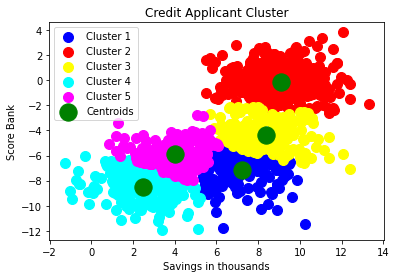

In [29]:
plt.scatter(data_array[y_kmeans == 0, 0], data_array[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(data_array[y_kmeans == 1, 0], data_array[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(data_array[y_kmeans == 2, 0], data_array[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
plt.scatter(data_array[y_kmeans == 3, 0], data_array[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data_array[y_kmeans == 4, 0], data_array[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'green', label='Centroids')
plt.title('Credit Applicant Cluster')
plt.xlabel('Savings in thousands')
plt.ylabel('Score Bank')
plt.legend()
plt.show()

In [30]:
# get the inertia of our model
kmeans.inertia_

3119.780420245327

In [31]:
# list of clusters
clusters = [1,2,3,4,5,6,7,8,9,10]
inertia_values = []

In [32]:
for cluster in clusters:
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(dataset)
    inertia_values.append(kmeans.inertia_)

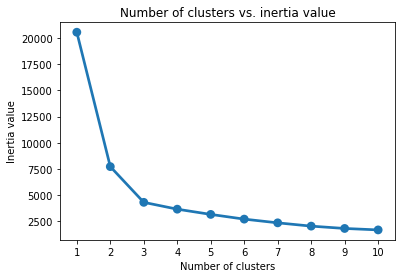

In [35]:
sns.pointplot(x = clusters, y = inertia_values)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia value')
plt.title('Number of clusters vs. inertia value')
plt.show()